# CS 171 PS 1
# Due: Sunday, October 18, 2020 @ 11:59pm

## Read *all* cells carefully and answer all parts (both text and missing code)

### Enter your information below:
<div style="color: #000000;background-color: #ee00ee">
    Total: 19/20<br>
    Late Days Used: 0
</div>
<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter): Mohamed Rayyan <br>
    Your student ID (submitter): 862037320
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>


## Overview

This problem set deals with IMDB review data (from [here](https://ai.stanford.edu/~amaas/data/sentiment/)).  This dataset consists of reviews with either poor (<=4) or good (>=7) ratings.  The cells below load in training and testing data.  For each point, there are 1000 features, corresponding to the 1000 most common words in the reviews.  Each feature's value is from 0 to 6, with 0 indicating that the word did not appear, 1 indicating the word appeared once, 2 indicating the word appears between 2 and 4 times, and so on.  The corresponding y values are 0 for a poor rating and 1 for a good rating.

**We will treat these features as categorical** (That is, each feature's value is not treated as numeric, but as 7 different values that happen to be encoded using integers.)

In [1]:
## THESE ARE THE ONLY LIBRARIES YOU MAY IMPORT!!
import numpy as np
import matplotlib.pyplot as plt

# below line just to make figures larger
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def loaddata(fname):
    M = np.loadtxt(fname,dtype=float)
    np.random.shuffle(M)
    X = M[:,1:]
    threshs = [0,1,2,4,8,16,32,1024]
    for (i,(t1,t2)) in enumerate(zip(threshs[:-1],threshs[1:])):
        X[(X>t1) & (X<=t2)] = i
    Y = M[:,0]
    Y[Y<=0] = 0 # data is originally +1, -1
    return (X,Y)

In [3]:
(trainX,trainY) = loaddata('train.txt')
(testX,testY) = loaddata('test.txt')

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 1:</font> <font size=+1>(4 points)</font>
    
In the cell below, plot a grid of histograms (5 columns, 4 rows)
Each histogram should be the distribution of a different feature (so you will be plotting just the first 20 features).  The histograms should have two sets of bars (each in their own color): ones for examples from class 0 and one for examples from class 1.  You want side-by-side histograms, each with 7 bars (for 14 bars in two colors). Be sure to give a title to each plot with the feature number.  Use only the training data for these histograms.
    
Hint: look up pyplot's [subplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html) and [hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) functions
    
As an example, the histogram in the upper left, corresponding to feature 0, should look like
    
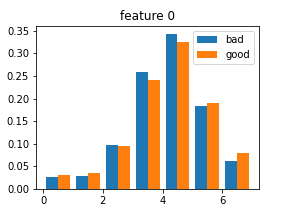  
</div>

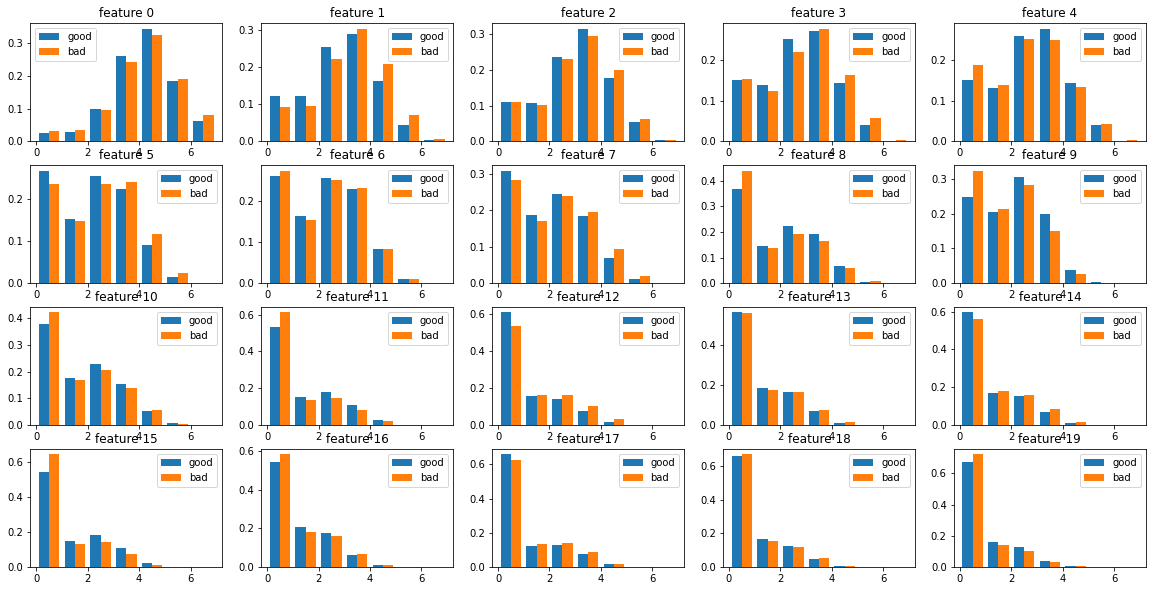

In [4]:
### YOUR CODE HERE
bad =[]
good =[]

labels =['good','bad']
for i in range(20):
    bad =[]
    good =[]
    for k in range(len(trainX)):
        if trainY[k] ==0:
            bad.append(trainX[k][i]);
        else:
            good.append(trainX[k][i]);
    plt.subplot(4,5,i+1)
    plt.hist((bad,good),7,range=(0,7),density=True)
    plt.legend(labels)
    plt.title('feature {}'.format(i))
plt.show()

<div style="color: #000000;background-color: #ee00ee">
    Problem 1: 4/4 
</div>

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 2:</font> <font size=+1>(4 points)</font>
    
For the 20 features above, based on the histograms you plotted, which would the most helpful three features for classifying this dataset using naive Bayes?  <b>WHY?</b>
</div>
    

### YOUR ANSWER HERE
Features 1, 9 and 15 show the greatest difference between the 2 classes.

<div style="color: #000000;background-color: #ee00ee">
    Problem 2: 4/4 
</div>

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 3:</font> <font size=+1>(10 points)</font>
        
Complete the two functions in the two cells below.

The first trains/learns a naive Bayes classifier.  The second predicts the classes for a set of examples based on the model learned.
    
Hint:  Test your code on the example from the slides in class.  You'll need to generate the data matrix yourself and your own testing examples.
    
Hint 2: You will have to deal with counts that are 0.  Leaving them as zero will result in 0 probabilities that will cause problems.  A standard way to handle this is to add 1 to all counts.  For frequent feature values, it does not change things much.  For infrequent values, it keeps them away from 0 and admits that they might happen more often.
</div>

In [9]:
info =dict()
def probAB(feat, k, clss, freq):
    #p(feat |clss) =p(clss |feat) *p(feat) /p(clss)
    col =freq[1]
    probA =(freq[0][k][feat]['value'] /col)
    
    #print('feat ={}'.format(feat))
    #print('col ={}'.format(k))
    #print('class ={}'.format(clss))
    #print('prob ={}'.format(probA))
    #print('value ={}'.format(freq[0][k][feat]['value']))
    #print('bad ={}'.format(freq[0][k][feat]['bad']))
    #print('good ={}'.format(freq[0][k][feat]['good']))
    
    
    temp =[]
    temp.append((((freq[0][k][feat]['bad'] /freq[0][k][feat]['value']) *probA) /clss[0]))
    temp.append((((freq[0][k][feat]['good'] /freq[0][k][feat]['value']) *probA) /clss[1]))
    
    return temp;

def learnnb(X,Y):
    # X is shape (m,n) (m data points, each with n features).  It has integer values from 0 to maxfeatval (inclusive)
    # Y is shape (m,) (m data points).  It has values of either 0 or 1 (class "0" or class "1")
    maxfeatval = X.max().max()
    # this function is to return a pair (priorp,condp)
    # where priorp is of shape (2,) and has the prior probability of each of the two classes
    #  and  condp is of shape (n,maxfeatval+1,2) and has the conditional probabilities for the naive Bayes classifier
    
    ## YOUR CODE HERE
    x =X.tolist()
    y =Y.tolist()
    
    priorp =(y.count(0)/len(y),y.count(1)/len(y))
    
    print('priorp =={}'.format(priorp))
    
    freq =dict()
    condp =[]
    
    for i in range(len(x[0])):
        freq[i] =dict()
        for k in range(len(x)):
            if x[k][i] in (freq[i]):
                (freq[i])[x[k][i]]['value'] =(freq[i])[x[k][i]]['value'] +1
                if y[k] ==1:
                    (freq[i])[x[k][i]]['good'] =(freq[i])[x[k][i]]['good'] +1
                else:
                    (freq[i])[x[k][i]]['bad'] =(freq[i])[x[k][i]]['bad'] +1
            else:
                (freq[i])[x[k][i]] =dict();
                (freq[i])[x[k][i]]['value'] =2;
                (freq[i])[x[k][i]]['good'] =1;
                (freq[i])[x[k][i]]['bad'] =1;

    for i in range(len(freq)):
        for k in range(7):
            if k not in freq[i]:
                freq[i][k] =dict()
                freq[i][k]['value'] =2
                freq[i][k]['bad'] =1
                freq[i][k]['good'] =1
    
    freq =(freq,len(y))
    
    info.clear()
    for i in range(len(freq[0])):
        tempM =[]
        tempK =list(freq[0][i].keys())
        info[i] =dict()
        for k in range(len(tempK)):
            temp =probAB(tempK[k],i,priorp,freq)
            tempM.append(temp)
            info[i][tempK[k]] =temp
        condp.append(tempM)

    #return (priorp,condp)  ## or whatever they are named in your code
    return (priorp,np.array(condp))


In [6]:
def prednb(X,model):
    # X is of shape (m,n) (m data points, each with n features).
    # model is the pair (priorp,condp), as returned from learnnb
    # should return something of shape (m,) which is an array of 0s and 1s, indicating
    # the predicted (most probable under NB) class for each of the examples in X
    (priorp,condp) = model
    
    ## YOUR CODE HERE
    #X =X +1
    pred =[]
    
    for i in range(len(X)):
        bad =priorp[0]
        good =priorp[1]
        for k in range(len(X[i])):
            bad =bad *info[k][X[i][k]][0]
            good =good *info[k][X[i][k]][1]
        pred.append(0 if bad >good else 1)

    pred =np.array(pred)
    return pred



<div style="color: #000000;background-color: #ee00ee">
    Problem 3: 9/10. Broadly correct. You have some plus-one errors and your choice of magic numper "7" is mysterious to me. 
</div>

<div style="color: #000000;background-color: #FFFFEE">
<font size=+2>Question 4:</font> <font size=+1>(2 points)</font>
The code below trains a naive Bayes classifier and then tests it on the testing examples and reports the error rate.
    
Run the code.  [note, just because your code runs on this example, does not mean it is correct; for instance, both classes are equally likely a priori in this example, which is not always true.]
    
Then answer the question, "<b>Is this error rate good?  How do you know?</b>"
</div>


In [ ]:
def errorrate(predY,trueY):
    if len(predY.shape)>1:
        predY = predY[:,0]
    if len(trueY.shape)>1:
        trueY = trueY[:,0]
    return (predY!=trueY).mean()

X = np.array([[0,2,5], #113
              [0,2,6], #113
              [0,3,6], #75
              [1,2,5], #113
              [0,4,5], #113
              [0,4,6], #75
              [1,3,6], #75
              [0,2,5], #113
              [1,2,5], #75
              [0,3,5]]) #113

Y = np.array( [1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

print('starting')
model =learnnb(trainX,trainY)
print('learning')
print('predicting')
predY =prednb(testX,model)
print('calculating error')
print(errorrate(predY,testY))
print('done')
print(model[1].shape)

<div style="color: #000000;background-color: #ee00ee">
    Problem 4: 2/2
</div>

### YOUR ANSWER HERE

An error rate of 27% is good (could be better) and definitely better than guessing which is an error of 50%.

My answer is based on common sense the lower the error rate the better the prediction is.